In [1]:
# assign directory
import os
BRANDON = '/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/'
YASH = '/Users/yashd/Desktop/hierarchical-bayesian-model-validation/'

ROOT_DIR = BRANDON
data_dir = ROOT_DIR + 'raw-data/toy-syntheticMRI-2D/sagittal-slice'
# iterate over files in that directory
file_list = [os.path.join(data_dir, filename) for filename in os.listdir(data_dir) if filename != ".DS_Store"]
file_names = os.listdir(data_dir)

In [2]:
from PIL import ImageFilter
from PIL.ExifTags import TAGS
import rembg
os.chdir(ROOT_DIR + "testing-framework/")
from utilities import *
from plot_utilities import *
os.chdir(ROOT_DIR + "dataset-preparation/")
from transform_utilities import *

In [3]:
coeffs, mags = convert_fourier_list(data_dir, c = 3)
real_data = np.real(coeffs)
imag_data = np.imag(coeffs)

In [4]:
n= len(real_data)
n

43896000

/Users/brandonmarks/opt/anaconda3/envs/Research/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/brandonmarks/opt/anaconda3/envs/Research/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


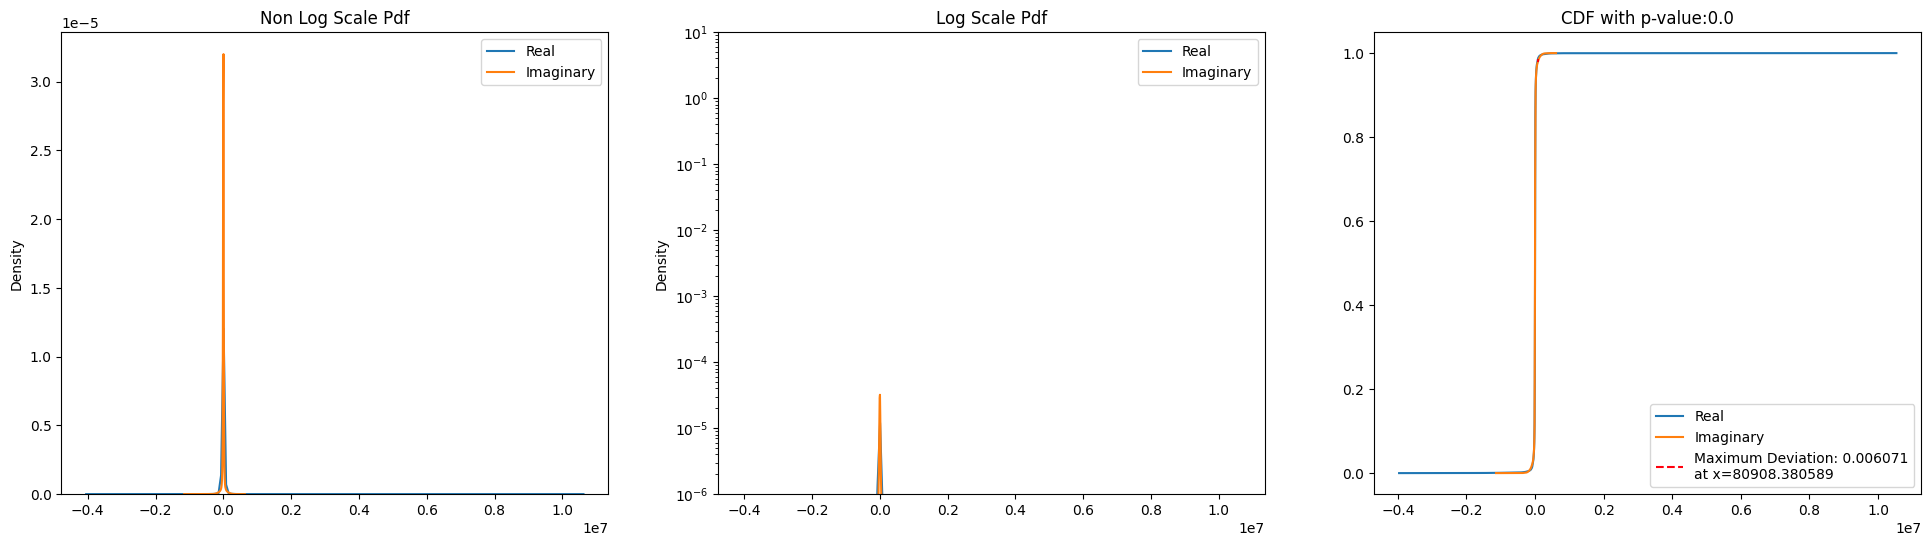

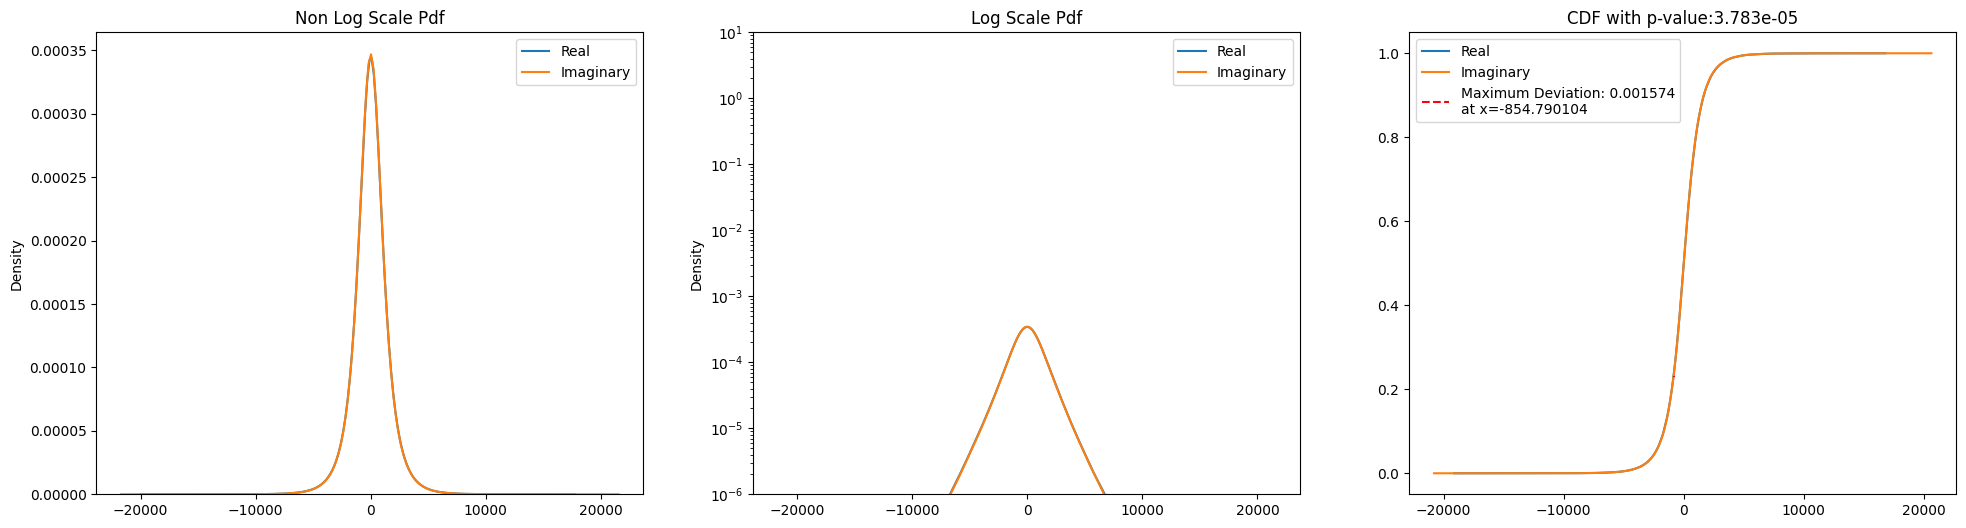

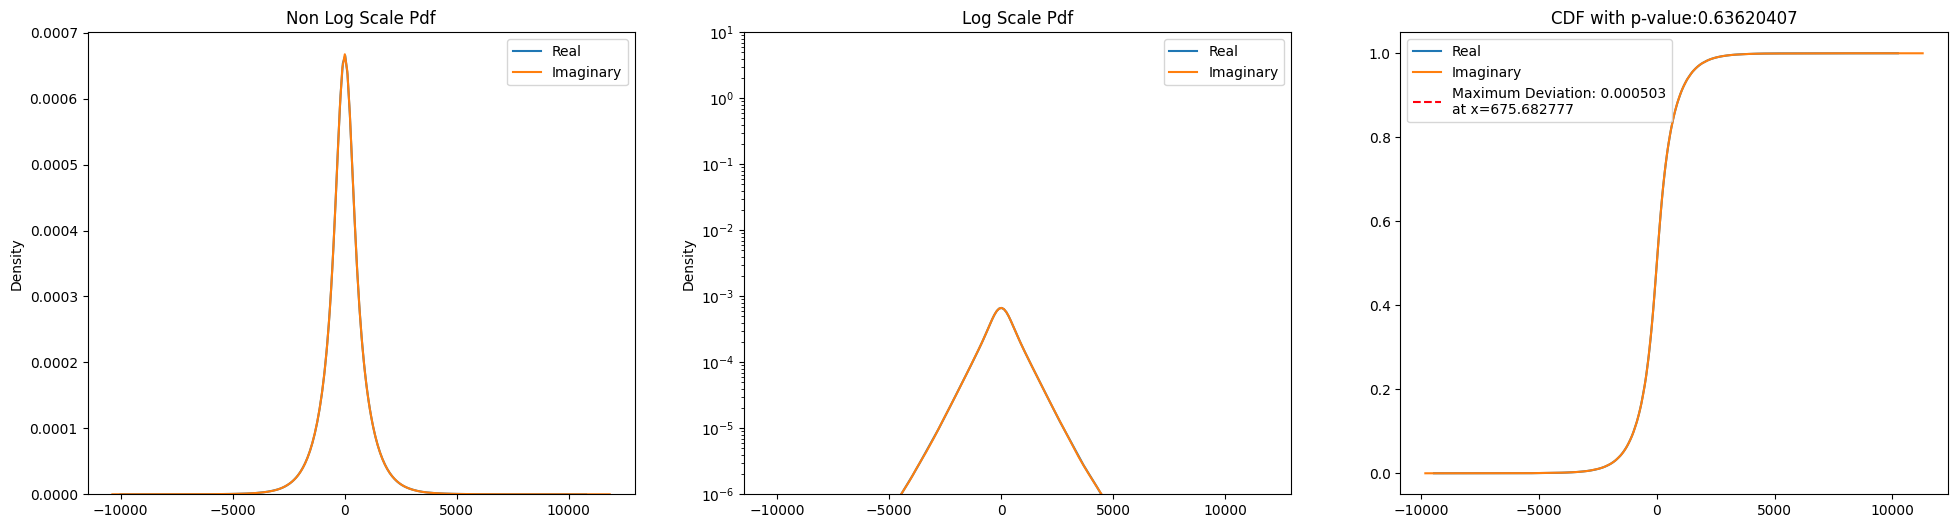

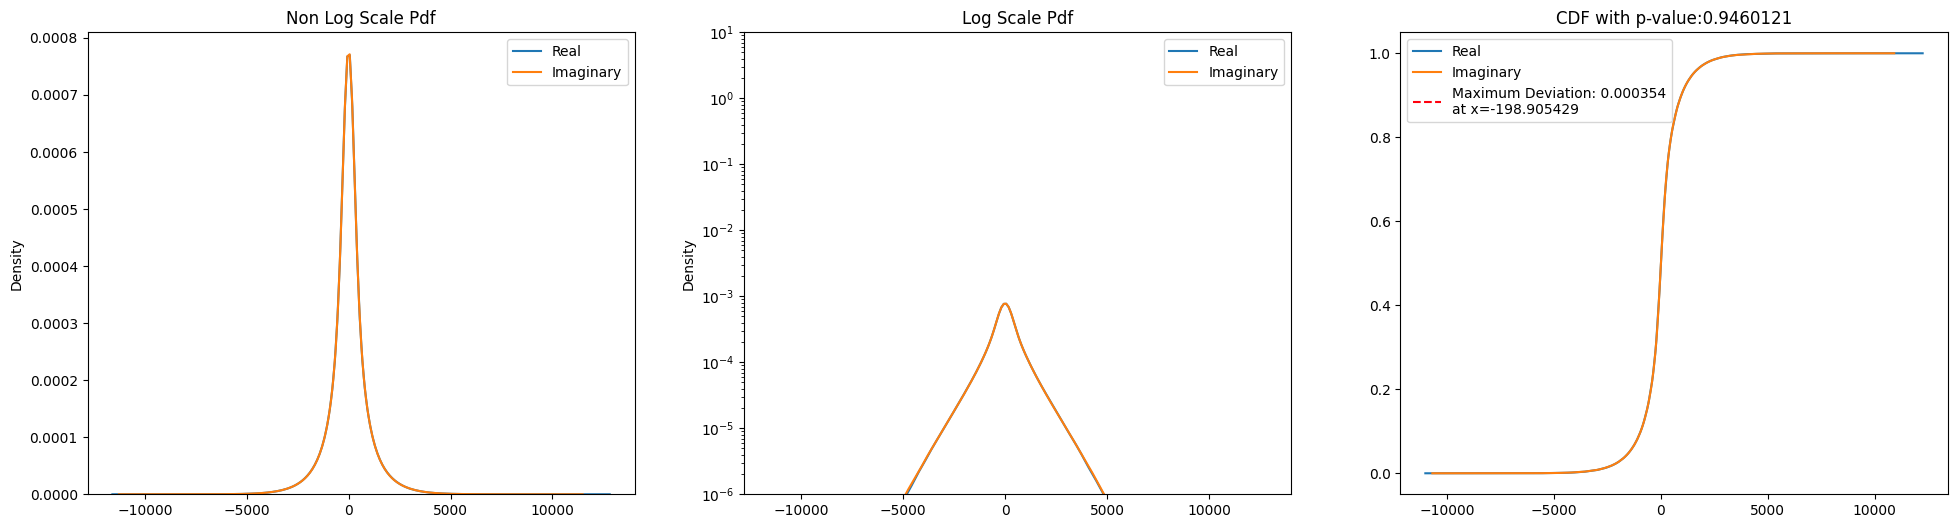

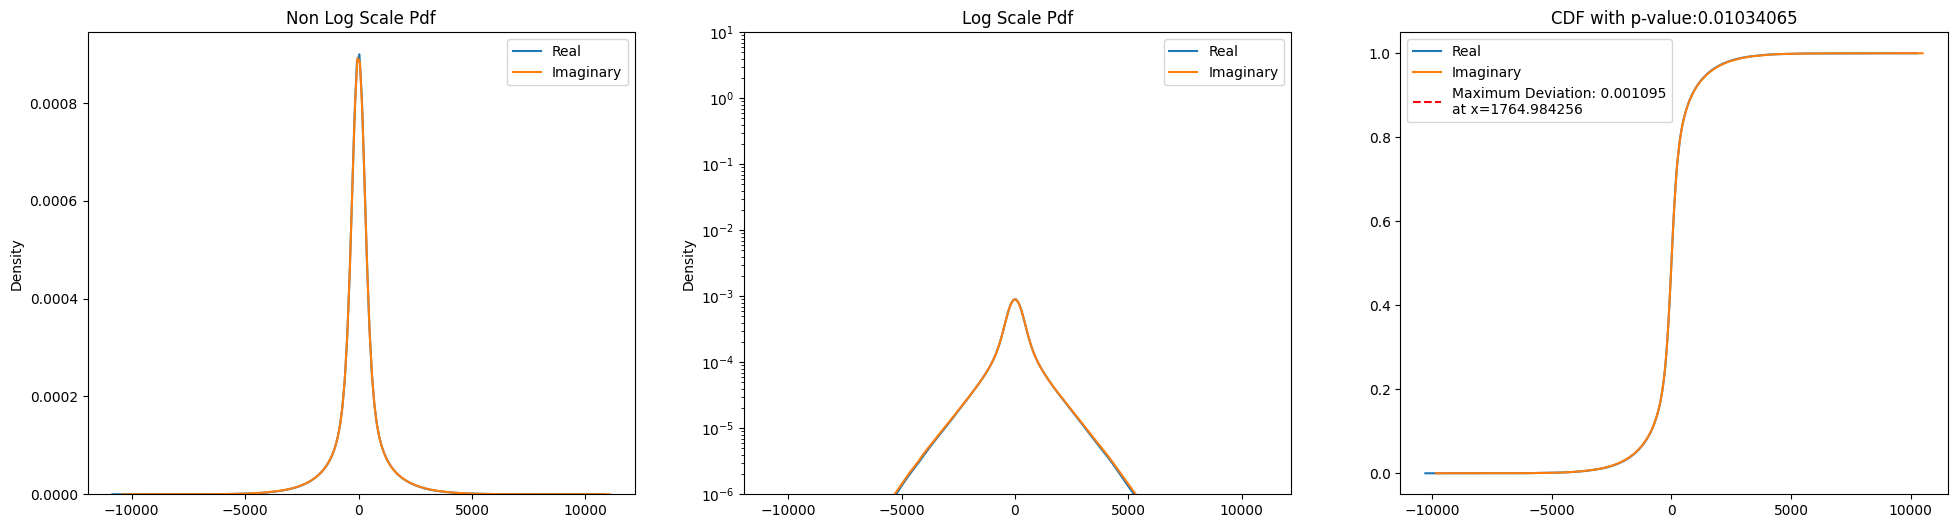

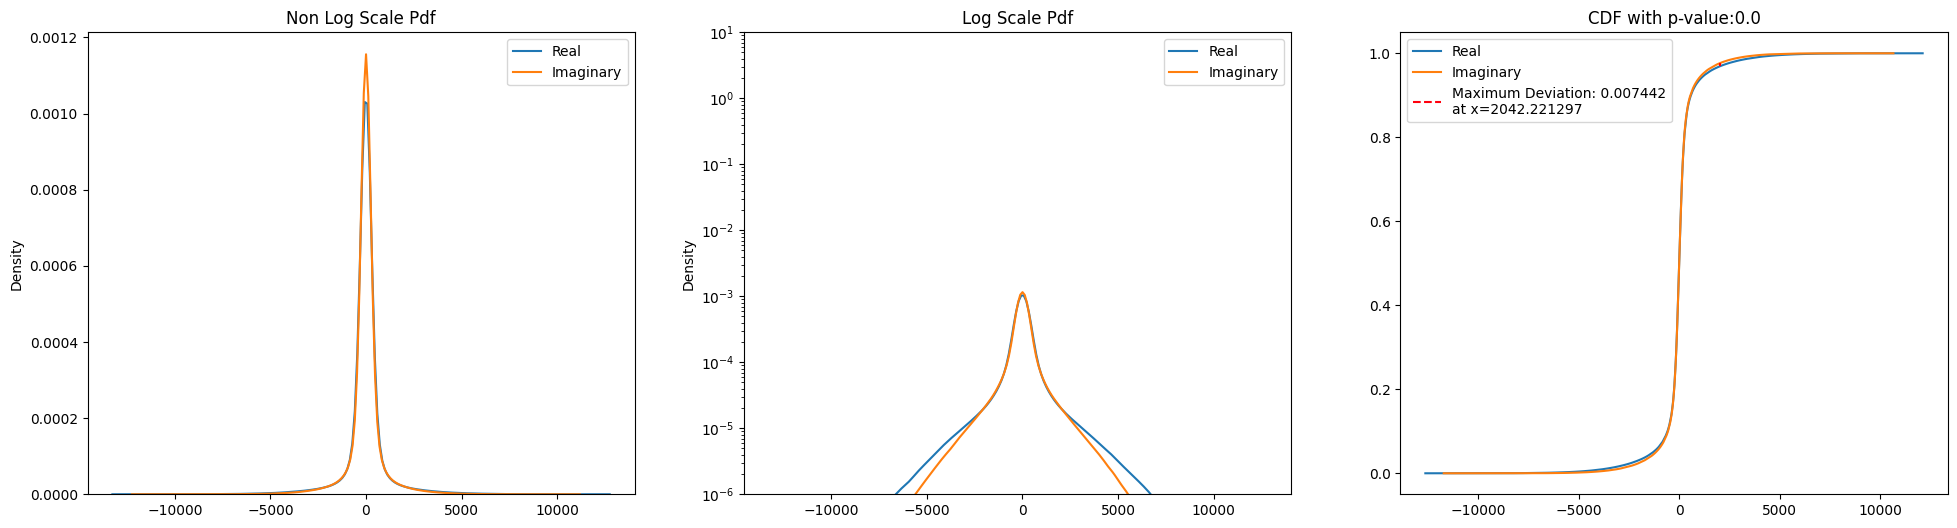

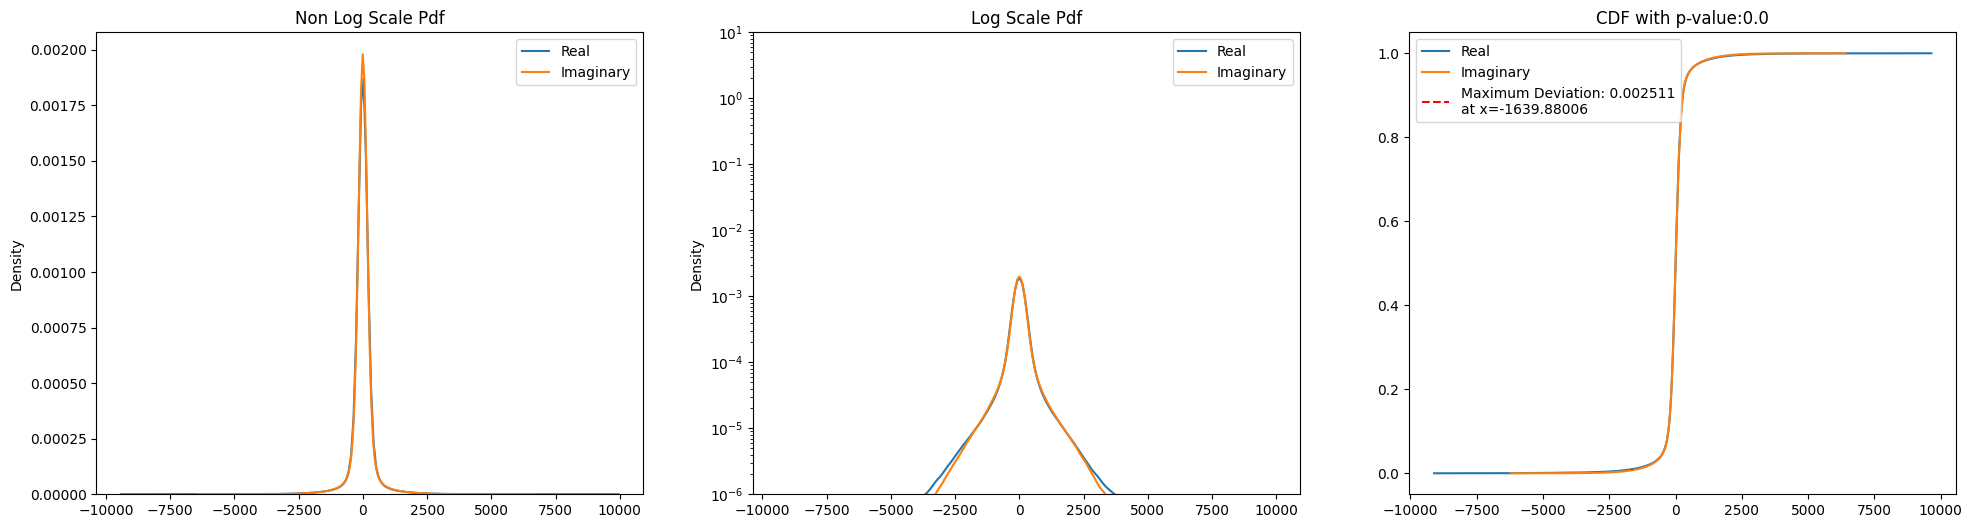

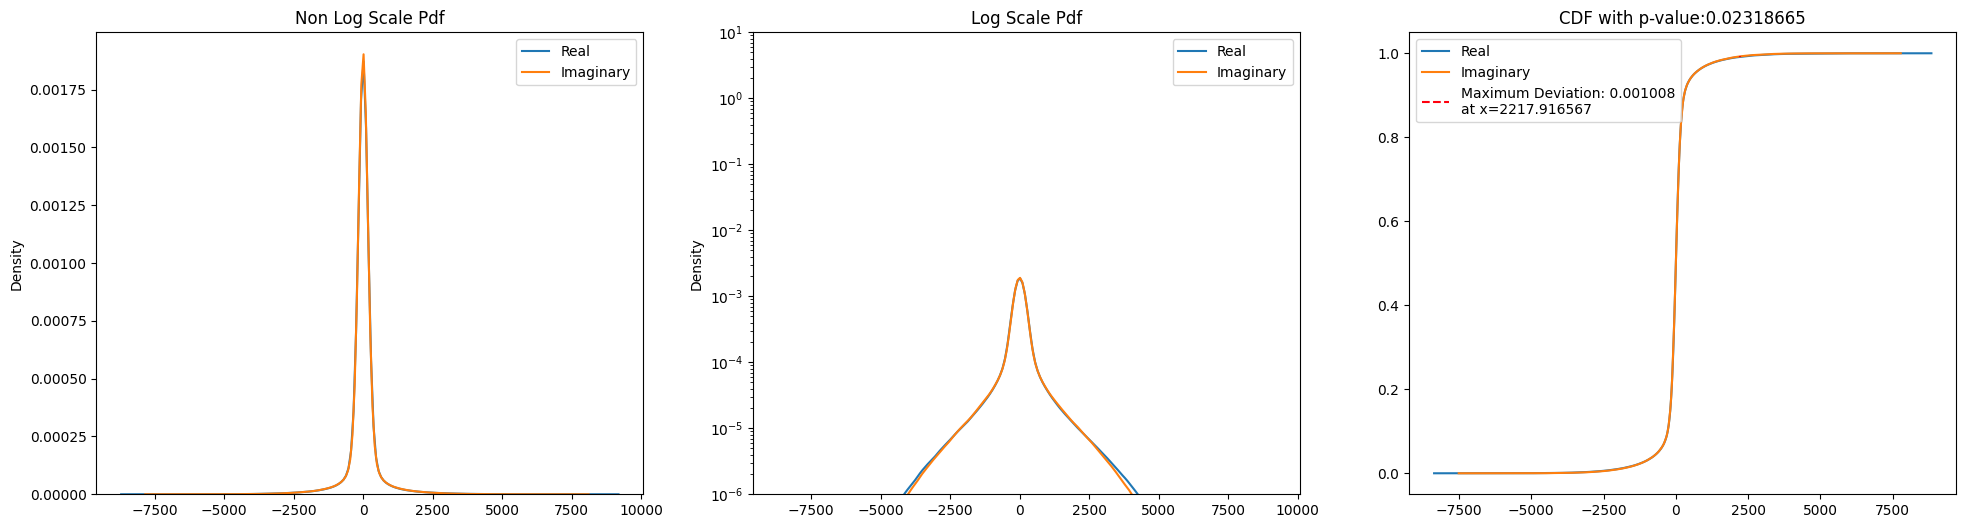

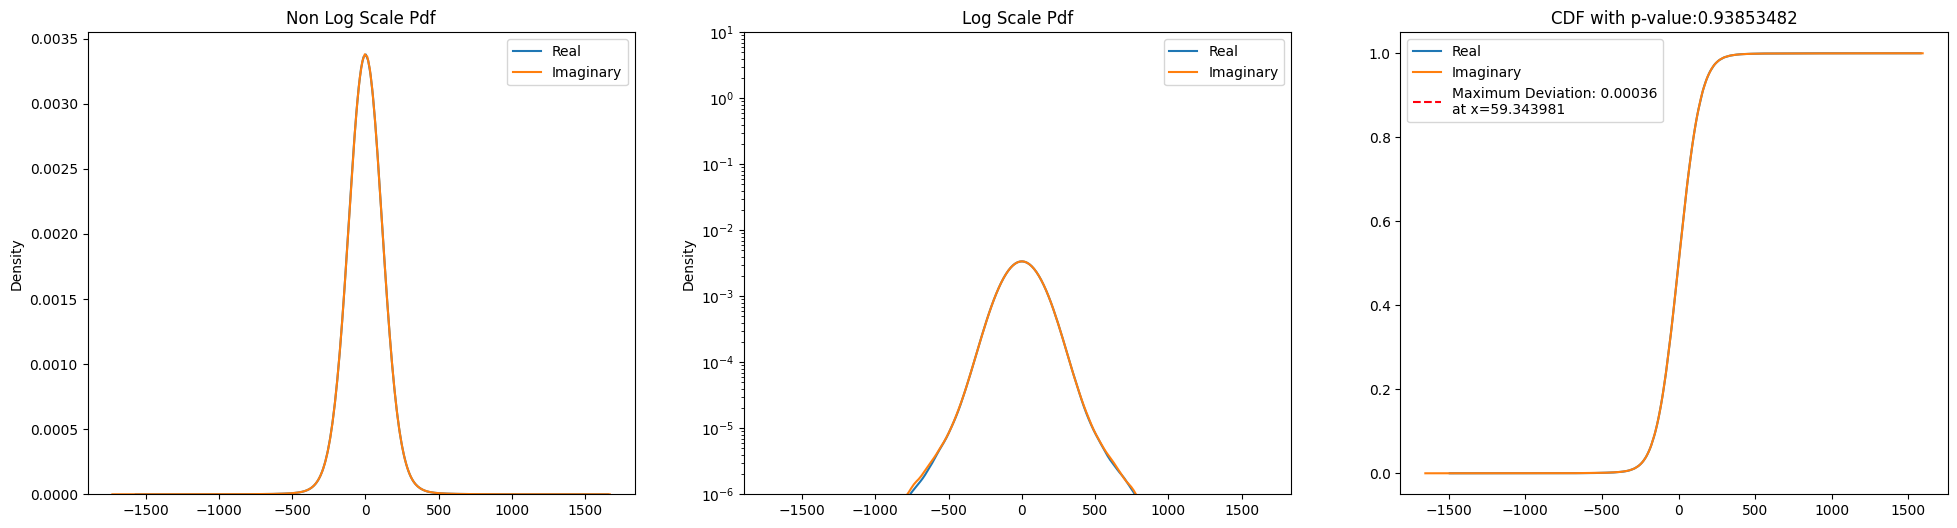

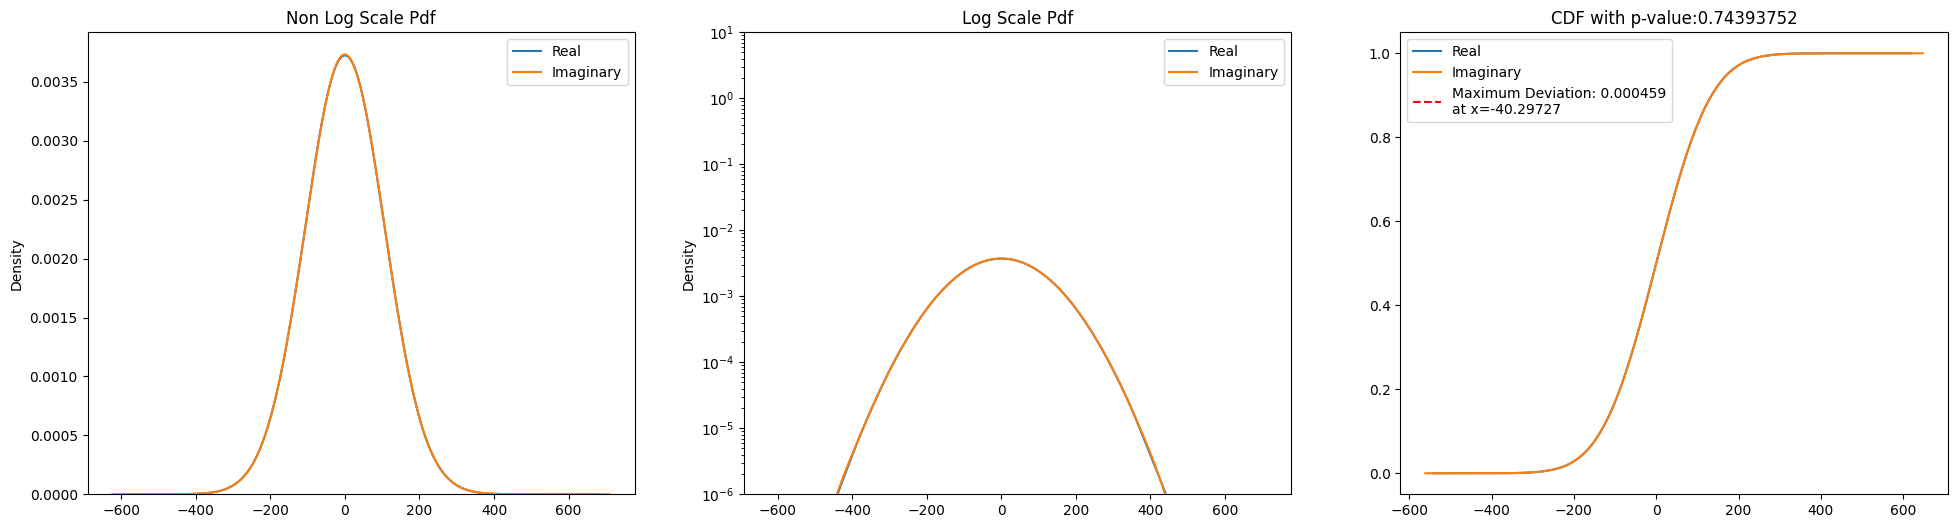

In [5]:

for i in range(10):
    twoSampleComparisonPlots(real_data[n//10 * i: n//10 * (i+1)], imag_data[n//10 * i: n//10 * (i+1)], samp1name="Real", samp2name="Imaginary")


In [6]:
n = len(file_list)
converted_003 = convert_to_fourier_basis(data_dir, "Gray", threshold =0.03, presplit= 2, max_depth = 9)
converted_003["number_of_coefficents"] = converted_003["data"].apply(lambda x:len(x))/(2 *n)
converted_003 = converted_003[converted_003["unique_magnitudes"] > 0]
converted_003

Both Endpoints Are The Same 0.0 and 0.0 Recursion Depth of 9
Both Endpoints Are The Same 0.0020161290322580645 and 0.0020161290322580645 Recursion Depth of 9
Recursion Depth Exceeded Endpoints are 0.002824858757062147 and 0.003470533571666544
Recursion Depth Exceeded Endpoints are 0.004032258064516129 and 0.0049233049972763265
Recursion Depth Exceeded Endpoints are 0.005649717514124294 and 0.006048387096774193
Recursion Depth Exceeded Endpoints are 0.0066755384404387375 and 0.006941067143333088
Recursion Depth Exceeded Endpoints are 0.008064516129032258 and 0.008711097476832073
Recursion Depth Exceeded Endpoints are 0.009384963935733138 and 0.010468965271945298
Recursion Depth Exceeded Endpoints are 0.011299435028248588 and 0.01242222898223378
Recursion Depth Exceeded Endpoints are 0.012816404270700722 and 0.013882134286666176
Recursion Depth Exceeded Endpoints are 0.014112903225806451 and 0.015201754683271958
Recursion Depth Exceeded Endpoints are 0.015364851493138227 and 0.0165532225

,band,channel,magnitude_endpoints,unique_magnitudes,data,number_of_coefficents
0,1,Gray,"(0.0, 0.0)",1,"[8208036.0, 8653454.0, 10060947.0, 8514950.0, ...",1.0
1,2,Gray,"(0.0020161290322580645, 0.0020161290322580645)",1,"[-2018254.4359985052, -2877901.2688313797, -31...",1.0
2,3,Gray,"(0.002824858757062147, 0.003470533571666544)",2,"[-1581952.3972484146, -1765332.9747361664, -20...",2.0
3,4,Gray,"(0.004032258064516129, 0.0049233049972763265)",2,"[-884242.7732809421, -1075777.91430203, -12480...",2.0
4,5,Gray,"(0.005649717514124294, 0.006048387096774193)",3,"[-1225679.7450678141, -845915.6349340901, -100...",3.0
...,...,...,...,...,...,...
70,71,Gray,"(0.4398010574868755, 0.4837726140202615)",5619,"[-44.74929220084359, 195.16981344458765, 160.5...",5619.0
71,72,Gray,"(0.48377846061113006, 0.4947612347600977)",1495,"[178.38187366372736, -62.98259597338, 40.53435...",1495.0
72,73,Gray,"(0.4947733873424998, 0.5002642655658536)",741,"[-53.6703657657453, 64.148148033506, 187.73440...",741.0
73,74,Gray,"(0.5002901788893644, 0.5057604335013076)",639,"[-13.602753247732622, -19.82095584128215, -217...",639.0


In [7]:
"0.06315556633711404"
filtered_003 = converted_003[converted_003["magnitude_endpoints"].apply(lambda x: x[0] > 0.06315556633711404)]
filtered_003

,band,channel,magnitude_endpoints,unique_magnitudes,data,number_of_coefficents
42,43,Gray,"(0.06331325463603522, 0.06598540896257378)",50,"[-47964.9327040242, 19560.21196495254, 13034.1...",50.0
43,44,Gray,"(0.06604412600860685, 0.06865722929938257)",52,"[-37680.7058554373, 53445.00034755984, 2457.80...",52.0
44,45,Gray,"(0.0687808162321341, 0.0714634743661548)",55,"[-11979.334595883392, -26680.359359842703, -17...",55.0
45,46,Gray,"(0.07159573394300651, 0.07423580680698914)",58,"[59100.48958102128, 51629.34623146331, 13782.8...",58.0
46,47,Gray,"(0.07438576431801619, 0.07693447398882054)",56,"[-25312.393272754594, -7763.461258570321, 4624...",56.0
47,48,Gray,"(0.07706957610268032, 0.08240701312052737)",123,"[-34162.95694484785, -9075.03306236938, -42440...",123.0
48,49,Gray,"(0.08253880246065956, 0.08794987569661904)",131,"[8908.020673354447, 14957.91237816638, -25844....",131.0
49,50,Gray,"(0.08795268150798044, 0.09345753816614231)",139,"[-10409.738608993877, -4262.968196756723, -130...",139.0
50,51,Gray,"(0.09349802609748492, 0.09898107574265219)",152,"[1176.8695583920853, -1579.6891577941205, -258...",152.0
51,52,Gray,"(0.0990454834532913, 0.10997003329549948)",314,"[12256.103689186122, -3743.1733667437584, -173...",314.0


 
0.07083 x - 5.888


/var/folders/0c/5hhs4r6n7pnc4jcl295d7j_c0000gn/T/ipykernel_28475/3674162930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_003["magnitude_length"] = filtered_003["magnitude_endpoints"].apply(lambda x: x[1] - x[0])


1.073403640959199

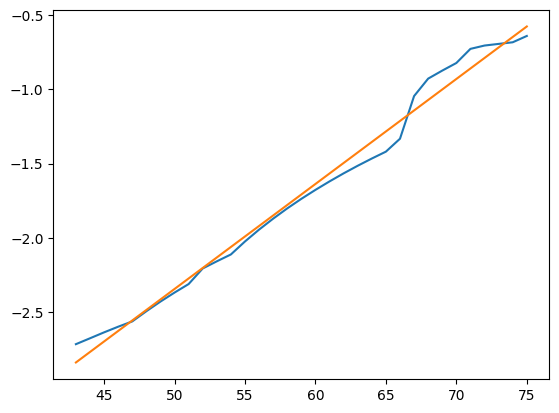

In [8]:

filtered_003["magnitude_length"] = filtered_003["magnitude_endpoints"].apply(lambda x: x[1] - x[0])
x = np.asfarray(filtered_003["band"].to_numpy())
y = np.asfarray(filtered_003["magnitude_endpoints"].apply(lambda x: x[1]).to_numpy())
logy = np.log(y)
plt.plot(x, logy)
print(np.poly1d(np.polyfit(x, logy, 1)))
plt.plot(x, np.poly1d(np.polyfit(x, logy, 1))(x))
np.exp(np.polyfit(x, logy, 1)[0])

In [11]:
splits = getSplits(0.06315556633711404,0.5277542315403191, 1.066)
splits

[0.06315556633711404,
 0.06732383371536357,
 0.07176720674057757,
 0.0765038423854557,
 0.08155309598289578,
 0.08693560031776691,
 0.09267334993873953,
 0.09878979103469634,
 0.10530991724298631,
 0.11226037178102342,
 0.11966955631857097,
 0.12756774703559667,
 0.13598721833994606,
 0.1449623747503825,
 0.15452989148390778,
 0.1647288643218457,
 0.17560096936708752,
 0.1871906333453153,
 0.19954521514610613,
 0.21271519934574915,
 0.2267544025025686,
 0.24172019306773812,
 0.25767372581020886,
 0.2746801917136827,
 0.29280908436678577,
 0.31213448393499366,
 0.33273535987470326,
 0.3546958936264337,
 0.37810582260577835,
 0.40306080689775975,
 0.42966282015301194,
 0.4580205662831108,
 0.4882499236577961,
 0.5204744186192107]

In [12]:
converted_with_splits = convert_to_fourier_basis(data_dir, "Gray", split_list = splits)
converted_with_splits

[0.06315557 0.06732383 0.07176721 0.07650384 0.0815531  0.0869356
 0.09267335 0.09878979 0.10530992 0.11226037 0.11966956 0.12756775
 0.13598722 0.14496237 0.15452989 0.16472886 0.17560097 0.18719063
 0.19954522 0.2127152  0.2267544  0.24172019 0.25767373 0.27468019
 0.29280908 0.31213448 0.33273536 0.35469589 0.37810582 0.40306081
 0.42966282 0.45802057 0.48824992 0.52047442]


,band,channel,magnitude_endpoints,unique_magnitudes,data
0,1,Gray,"(0.0, 0.06312501326028154)",579,"[8208036.0, 8653454.0, 10060947.0, 8514950.0, ..."
1,2,Gray,"(0.06315557733711404, 0.06728497600316972)",72,"[4767.518941383358, -4641.407653600238, 28077...."
2,3,Gray,"(0.0673451955370828, 0.07172875445535908)",91,"[27975.19455626599, 6136.731146741515, 26162.4..."
3,4,Gray,"(0.07182814570836266, 0.07649805547847523)",98,"[50889.20541991507, 11870.94086902578, 9902.38..."
4,5,Gray,"(0.07651063238231065, 0.08143291270426077)",111,"[2623.9268908146696, 24006.75690830736, -23175..."
5,6,Gray,"(0.0816251308935816, 0.08687744609468727)",126,"[-26104.933213509346, 26656.85576441887, -7632..."
6,7,Gray,"(0.08694597319450965, 0.09264549857529308)",146,"[-11929.926024279419, 556.2178862150722, -2533..."
7,8,Gray,"(0.0927226806135269, 0.0987737620009022)",163,"[13943.210292707952, 6707.5939403511875, -1044..."
8,9,Gray,"(0.09879032258064516, 0.10530002040652996)",191,"[-18337.241524667133, -22248.462810600427, -10..."
9,10,Gray,"(0.10531987269628601, 0.11224029672292606)",210,"[-1066.2981520930225, -8219.078394115886, -763..."
